In [2]:
import numpy as np

# 2장

Tab을 누르면 자동완성 기능이 있다. 

In [12]:
b = [1,2,3]
b? ## Docstring

In [14]:
%run ./data/ipython_script_test.py  #Ipython 세션 안에서 파이썬 프로그램 실행

In [17]:
c   # 스크립트에서 정의된 모든 변수는 실행된 후에 IPyhon에서 접근가능

4.5

In [16]:
result

3.3333333333333335

스크립트에서 IPython 네임스페이스에서 선언된 변수에 접근하려면 
> %run -i



## Jupyter Notebook에선 실행이 안되네요 Ipython 용인듯

1. Copy the lines you want to copy into IPython into the clipboard
2. Enter %paste into IPython
3. Press enter
4. Profit!

In [36]:
%cpaste

UsageError: Line magic function `%cpaste` not found.


In [39]:
%paste

UsageError: Line magic function `%paste` not found.


In [49]:
%paste

UsageError: Line magic function `%paste` not found.


## 매직 명령어
### 시간 측정 %timeit

In [54]:
a = np.random.randn(100,100)
%timeit np.dot(a,a)

46.1 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [56]:
%pwd ## print working directory

'C:\\Users\\WJ\\Desktop'

부록 B 교재 635p 참조

In [8]:
!ls #ls는 리눅스용 명령어

4.png		lost+found   test.sh	      Untitled2.ipynb
data_represent	pokemon_eda  Untitled1.ipynb  Untitled.ipynb


In [10]:
foo = '*.ipynb' #ls는 리눅스용 명령어
!ls $foo

Untitled1.ipynb  Untitled2.ipynb  Untitled.ipynb


In [57]:
foo =%pwd

In [58]:
foo

'C:\\Users\\WJ\\Desktop'

#### 오토매직 
매직 함수와 같은 이름의 변수가 선언되지 않으면 % 없이도 매직함수 사용가능하게 하는 옵션

In [60]:
%automagic


Automagic is ON, % prefix IS NOT needed for line magics.


In [61]:
pwd

'C:\\Users\\WJ\\Desktop'

## matplolib 통합

In [62]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [63]:
%matplotlib inline

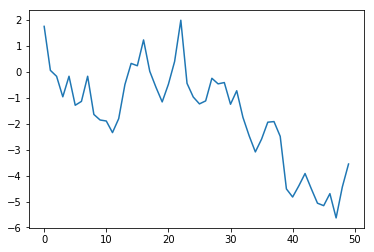

In [69]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(50).cumsum())

# 3장

튜플은 저장된 객체 자체는 변경 가능하다.
하지만 각 슬롯에 저장된 객체를 변경하는 것은 불가능하다.

In [122]:
tt = [1,2,3]
tup = tuple(['foo', [1, 2], True,tt])
tup[2] = False  # 에러 발생

TypeError: 'tuple' object does not support item assignment

튜플 내에 저장된 객체는 그 위치에서 바로 변경이 가능하다.

In [81]:
tup[1].append(3)

In [82]:
tup

('foo', [1, 2, 3], True, [1, 2, 3])

In [83]:
tt.append(1)

In [84]:
tup

('foo', [1, 2, 3], True, [1, 2, 3, 1])

In [28]:
y = 7
if x > 5:
    x += 1
    
    y = 8

## Diconary은 3.6부터는 삽입한 순서대로 나온다.

3.6 이하에서는 불러올때마다 랜덤이었습니다.

## 중복된 List Comprehension

In [88]:
all_data = [['지수','세휘','소정'],['철원','예린','연주']]

In [91]:
result = [name for names in all_data for name in names   # for 1번, for 2번 
         if name.count('지') >= 1]
result

['지수']

In [95]:
some_tuples = [(1, 2, 4), (4, 5, 6), (7, 8, 9)]

flattened = [x for tup in some_tuples for x in tup] # for 1번, for 2번

flattened

[1, 2, 4, 4, 5, 6, 7, 8, 9]

In [98]:
[[x for x in tup] for tup in some_tuples] # [ [for 2번]   # for 1번째]

[[1, 2, 4], [4, 5, 6], [7, 8, 9]]

## 함수 관련 p.116

In [100]:
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']

In [102]:
strings.sort(key = lambda x: len(set(list(x))))
strings # 종류 1, 종류 2,  종류 2, 종류 3, 종류 4 

['aaaa', 'foo', 'abab', 'bar', 'card']

## 커링 일부 인자(augment만 취하기)

In [103]:
def add_numbers(x, y):
    return x + y

In [105]:
add_five = lambda y: add_numbers(5, y)
add_five(4)

9

In [108]:
from functools import partial
add_five_2 = partial(add_numbers, 5)
add_five_2(3)

8

## 제네레이터 표현식

In [111]:
gen = (x ** 2 for x in range(100))
gen

<generator object <genexpr> at 0x0000020806BD54F8>

In [112]:
sum(gen)

328350

In [113]:
dict((i, i **2) for i in range(5))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

## itertools

|함수| 설명 |
|:--|:----|
|combinations(iterable, k)|순서 고려하지않은 길이 k 조합|
|permutations(iterable, k)|순서 고려한 길이 k 조합|
|groupby(iterable[,keyfunc])| iterable에서 각자 고유한 키에 따라 그룹 생성|
|product(*iterables, repeat = 1)|iterable에서 카테시안 곱을 구한다. 중첩된 for 문 사용과 유사|

# 부록 A 고급 Numpy

##  ndarray 객체 구조 

__데이터 포인터__ Ram이나 메모리 맵 파일에서 데이터의 블록 

__dtype__ 배열 내에서 값을 담는 고정된 크기를 나타냄

__shape__ 모양을 알려주는 튜플 
 
__stride__ 하나의 차원을 따라 다음 원소로 몇 바이트로 이동해야 하는지 

## dtype 

실수에도 다양한 형태(float16 ~ flaot128), 정수, 복소수(complex)까지 

In [21]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

## stride

In [20]:
np.ones((3, 4, 5), dtype = np.complex64).strides

(160, 40, 8)

In [6]:
np.ones((3, 4, 5), dtype = np.float64).strides

(160, 40, 8)

In [8]:
np.ones((3, 4, 5), dtype = np.float32).strides

(80, 20, 4)

In [9]:
np.ones((3, 4, 5), dtype = np.int32).strides

(80, 20, 4)

In [7]:
np.ones((3, 4, 5), dtype = np.int8).strides

(20, 5, 1)

In [14]:
np.ones((3, 4, 5), dtype = np.integer).strides

(80, 20, 4)

stride - (가끔 음수일 경우도 있다.(메모리상 뒤로 이동할 경우)

In [12]:
np.ones((3, 4, 5), dtype = np.float64)[::-1].strides

(-160, 40, 8)

## 배열 순서 

C는 로우 우선 순서 (상위 차원을 우선 탐색(1번 축을 0번 축보다 우선 탐색)

F는 포트란(칼럼) 우선순서 (0번 축을 1번 축보다 우선 탐색)

순서에 대한 자세한 내용은 데이터 교재 593 참조 

> C는 C언어 F는 포트란 언어를 의미

## 차원(축) 순서 

In [66]:
dimen = np.arange(12)
dimen = dimen.reshape(4,3)
dimen

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [67]:
dimen.shape

(4, 3)

In [68]:
dimen.shape[0]

4

In [69]:
dimen.shape[1]

3

In [78]:
dimen.shape[-1]

3

In [72]:
dimen_three = np.arange(24)
dimen_three = dimen_three.reshape(3,4,2)
dimen_three

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [73]:
dimen_three.shape

(3, 4, 2)

In [74]:
dimen_three.shape[0]

3

In [75]:
dimen_three.shape[1]

4

In [76]:
dimen_three.shape[2]

2

In [77]:
dimen_three.shape[-1] # Tuple의 index니깐 마이너스 인덱싱 가능

2

## 축 순서 - 2차원의 경우

![ex_screenshot](./data/축설명0.jpeg)

## 축 순서 3차원의 경우

![ex_screenshot](./data/축설명1.jpeg)

## 배열 모양 바꾸기 

In [26]:
arr = np.arange(12)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [28]:
arr.reshape((4, 3 ))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [29]:
arr.reshape((4, 3 ), order = 'C')

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [30]:
arr.reshape((4, 3 ), order = 'F')

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

### 알아서 값 맞춰주는 -1

In [31]:
arr.reshape((4, -1 ), order = 'C')

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [85]:
arr.reshape((4, -1 ), order = 'C').shape

(4, 3)

## 배열 바꾸기 3차원

In [86]:
arr.reshape((1,4,3,), order = 'C') ## 위랑 생긴건 똑같이 생김

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]])

In [87]:
arr.reshape((1,4,3,), order = 'C').shape # shape는 (1, 4, 3)

(1, 4, 3)

In [35]:
arr.reshape((-1,4,3,), order = 'C') 

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]])

In [38]:
arr.reshape((4,3, 1), order = 'C')

array([[[ 0],
        [ 1],
        [ 2]],

       [[ 3],
        [ 4],
        [ 5]],

       [[ 6],
        [ 7],
        [ 8]],

       [[ 9],
        [10],
        [11]]])

In [43]:
arr.reshape((4,3, 1), order = 'F')

array([[[ 0],
        [ 4],
        [ 8]],

       [[ 1],
        [ 5],
        [ 9]],

       [[ 2],
        [ 6],
        [10]],

       [[ 3],
        [ 7],
        [11]]])

## 평탄화하는 flatten, ravel 

ravel은 원본의 복사본 생성 X  (즉 데이터의 용량이 너무 커서 복사본 만드는게 힘들 때)

flatten은 항상 데이터의 복사본 반환 (원본 데이터를 보존해야할 필요가 있을 때)

In [41]:
arr.reshape((4,3,1), order = 'C').flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
arr.reshape((4,3,1), order = 'F').flatten()

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

In [44]:
arr.reshape((4,3,1), order = 'C').ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## 데이터 이어 붙이기

numpy.concatenate

In [48]:
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[7,8,9],[10,11,12]])
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
arr2

array([[ 7,  8,  9],
       [10, 11, 12]])

In [50]:
np.concatenate([arr1, arr2], axis = 0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [51]:
np.concatenate([arr1, arr2], axis = 1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

stack, split 계열의 다양한 명령어가 있습니다. 이때 설정한 차원 축에 따라 다르게
쌓아지니 익숙해 지는데 연습이 필요합니다.

참고: 교재 595p

## 브로드 캐스팅

모양이 다른 배열끼리 Numpy가 알아서 맞춰주는 연산

> __브로드 캐스팅 규칙__                 
> 이어지는 각 차원(시작부터 끝까지)에 대해 축의 길이가 일치하거나 둘 중 하나의 길이가 1이라면 브로드캐스팅 호환이 된다.           
> 브로드 캐스팅은 누락된, 혹은 길이가 1인 차원에 대해서 수행된다. 

In [123]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [124]:
arr * 4

array([ 0,  4,  8, 12, 16])

In [125]:
arr = np.random.randn(4, 3)
arr.mean(0)

array([ 0.3369871 ,  0.20815655, -0.04083848])

In [127]:
demeaned = arr - arr.mean(0)
demeaned

array([[ 1.36952715,  0.71265479,  1.17812329],
       [-0.4908037 ,  0.76143627, -0.75380346],
       [-0.00706672,  0.60067915, -0.40074551],
       [-0.87165673, -2.07477022, -0.02357431]])

In [128]:
demeaned.mean(0)

array([-2.77555756e-17,  1.11022302e-16, -1.04083409e-17])

In [133]:
row_means= arr.mean(1)
row_means

array([ 1.25487013,  0.00704476,  0.23239069, -0.8218987 ])

In [134]:
row_means.shape

(4,)

In [135]:
row_means.reshape((4, 1))

array([[ 1.25487013],
       [ 0.00704476],
       [ 0.23239069],
       [-0.8218987 ]])

In [137]:
demeaned = arr - row_means.reshape((4, 1))
demeaned

array([[ 0.45164413, -0.3340588 , -0.11758533],
       [-0.16086136,  0.96254806, -0.80168671],
       [ 0.09752969,  0.576445  , -0.67397469],
       [ 0.28722907, -1.04471498,  0.7574859 ]])

In [139]:
demeaned.mean(1)

array([-3.70074342e-17, -3.70074342e-17, -3.70074342e-17,  0.00000000e+00])

## 다차원에서 브로드 캐스팅 하기

어렵습니다.

In [142]:
arr = np.arange(12).reshape(4,3)

In [145]:
arr - arr.mean(1) # 생각 없이 하면 에러납니다.

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [178]:
arr.mean(1).shape

(4,)

브로드 캐스팅 차원은 작은 배열에서는 반드시 1이여야 하기 때문에 (4,)은 에러가 발생합니다.

아래 처럼 (4, 1) 로 고쳐 줍시다.

In [146]:
arr - arr.mean(1).reshape((4, 1))

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

## 예외 규칙 첫번째 1은 없어도 됩니다.

In [183]:
arr_3d = np.arange(30).reshape(2,5,3)

In [184]:
arr_3d

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [191]:
ex = np.arange(15).reshape(1,5,3)
ex

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]]])

In [192]:
arr_3d - ex

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]]])

In [187]:
ex = np.arange(15).reshape(5,3)

In [189]:
arr_3d - ex

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]]])

![ex_screenshot](./data/3차원브로드캐스팅.jpeg)

그래서 일반적으로 1축, 2축으로 길이 1 축을 추가해야하는데 reshape는 새로운 튜플을 만들어야하니깐

np.newaxis라는 속성을 배열 전체 슬라이스랑 함께 사용해서 새로운 축을 추가 할 수 있습니다.

In [195]:
arr = np.zeros((4, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [196]:
arr_3d = arr[:, np.newaxis, :]
arr_3d # shape (4, 1, 4)

array([[[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]]])

In [149]:
arr_3d.shape

(4, 1, 4)

In [197]:
arr_1d = np.random.normal(size=3)

In [198]:
arr_1d #shape가 (3,)

array([ 0.5530691 ,  0.776285  , -1.09790378])

In [156]:
arr_1d[:, np.newaxis] # shape (3,1)

array([[ 0.08803661],
       [-0.79308362],
       [-0.04132987]])

In [157]:
arr_1d[np.newaxis, :] # shape (1,3)

array([[ 0.08803661, -0.79308362, -0.04132987]])

In [204]:
arr = np.random.randn(3, 4, 5)
arr

array([[[ 1.99351040e+00, -1.62527416e+00, -3.16290243e-03,
          5.06107010e-01, -1.26039359e+00],
        [ 1.99705815e+00, -4.99628109e-01, -8.45731388e-01,
          1.67150101e+00,  7.55631095e-02],
        [ 8.57915320e-01, -1.55725474e-02, -1.50640976e+00,
         -1.12543840e+00,  8.38143903e-01],
        [ 1.19384194e+00,  1.12152835e-01,  3.61815521e-02,
          8.95306171e-01, -4.21942753e-02]],

       [[-6.44775579e-01, -8.10948106e-01, -4.87033069e-01,
         -2.94676280e-01, -1.22179668e+00],
        [ 3.37236866e+00,  8.61221572e-01, -1.60334507e+00,
         -1.46365021e+00, -1.18426330e+00],
        [-2.21749181e-01, -5.89521470e-01,  2.24195179e+00,
         -1.11864292e+00,  5.55259861e-01],
        [ 1.58032071e-01,  9.24956225e-01,  1.41176621e+00,
         -1.52536820e-01, -1.07991184e+00]],

       [[ 1.49723714e+00,  4.93353106e-02, -1.09472895e+00,
         -5.61288922e-01,  1.10479326e+00],
        [ 4.94989390e-01,  4.22723953e-01, -5.95859715e-01,


In [205]:
depth_means = arr.mean(2) # 2번 축잡고 mean
depth_means

array([[-0.07784265,  0.47975255, -0.1902723 ,  0.43905764],
       [-0.69184594, -0.00353367,  0.17345962,  0.25246117],
       [ 0.19906957, -0.0103668 , -0.49378817,  0.37547722]])

In [161]:
depth_means.shape

(3, 4)

In [208]:
demeaned = arr - depth_means[:, :, np.newaxis] # np.newaxis로 2번축 5번만큼 만들어 주기
demeaned

array([[[ 2.07135305, -1.54743152,  0.07467975,  0.58394966,
         -1.18255094],
        [ 1.51730559, -0.97938066, -1.32548394,  1.19174846,
         -0.40418944],
        [ 1.04818762,  0.17469975, -1.31613747, -0.9351661 ,
          1.0284162 ],
        [ 0.75478429, -0.32690481, -0.40287609,  0.45624853,
         -0.48125192]],

       [[ 0.04707036, -0.11910216,  0.20481287,  0.39716966,
         -0.52995074],
        [ 3.37590233,  0.86475524, -1.5998114 , -1.46011654,
         -1.18072963],
        [-0.3952088 , -0.76298109,  2.06849217, -1.29210253,
          0.38180024],
        [-0.0944291 ,  0.67249506,  1.15930504, -0.40499799,
         -1.33237301]],

       [[ 1.29816757, -0.14973426, -1.29379852, -0.76035849,
          0.9057237 ],
        [ 0.50535619,  0.43309075, -0.58549292, -0.48029093,
          0.12733691],
        [-0.35197655, -0.58746384,  1.34036626,  0.14726754,
         -0.54819341],
        [-0.8138599 ,  0.79464725,  0.76452672, -0.26189417,
         -0

In [209]:
demeaned.mean(2)

array([[-4.44089210e-17,  6.66133815e-17, -4.44089210e-17,
         1.11022302e-17],
       [ 8.88178420e-17,  8.88178420e-17,  1.11022302e-17,
        -4.44089210e-17],
       [ 4.44089210e-17, -2.22044605e-17, -1.11022302e-16,
         0.00000000e+00]])

## 브로드 캐스팅 통해서 배열에 값 대입

In [165]:
arr = np.zeros((4, 3))
arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [170]:
arr[:] = 5
arr # 5가 전파되었음

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [174]:
col = np.array([1.28, -0.42, 0.44, 1.6])
col.shape

(4,)

In [171]:
arr[:] = col[:, np.newaxis] #새 축(col)에 값 브로드캐스팅 대입
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [168]:
arr[:2] = [[-1.37], [0.509]]  # 0,1행에 값 브로드캐스팅 대입
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

## 퀴즈) 3차원 까지 늘릴려면

## ufnc 사용법

반복문 작성하지않고 바로 바로 계산해주는 코드 

교재 610p 표 A-2 참조

예시는 outer(x,y) x 와 y의 모든 원소 조합에 대해 연산 적용. 그렇기에 결과 배열이 x.shape(튜플) + y.shape(튜플)의 형태

In [106]:
x,  y = np.arange(12).reshape(3,4), np.arange(6).reshape(2,3)

In [107]:
result = np.outer(x, y)

In [108]:
x[0]

array([0, 1, 2, 3])

In [109]:
y

array([[0, 1, 2],
       [3, 4, 5]])

In [110]:
result.shape

(12, 6)

In [111]:
result

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5],
       [ 0,  2,  4,  6,  8, 10],
       [ 0,  3,  6,  9, 12, 15],
       [ 0,  4,  8, 12, 16, 20],
       [ 0,  5, 10, 15, 20, 25],
       [ 0,  6, 12, 18, 24, 30],
       [ 0,  7, 14, 21, 28, 35],
       [ 0,  8, 16, 24, 32, 40],
       [ 0,  9, 18, 27, 36, 45],
       [ 0, 10, 20, 30, 40, 50],
       [ 0, 11, 22, 33, 44, 55]])

In [112]:
result = np.multiply.outer(x, y)

In [113]:
result.shape

(3, 4, 2, 3)

In [114]:
result

array([[[[ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 0,  2,  4],
         [ 6,  8, 10]],

        [[ 0,  3,  6],
         [ 9, 12, 15]]],


       [[[ 0,  4,  8],
         [12, 16, 20]],

        [[ 0,  5, 10],
         [15, 20, 25]],

        [[ 0,  6, 12],
         [18, 24, 30]],

        [[ 0,  7, 14],
         [21, 28, 35]]],


       [[[ 0,  8, 16],
         [24, 32, 40]],

        [[ 0,  9, 18],
         [27, 36, 45]],

        [[ 0, 10, 20],
         [30, 40, 50]],

        [[ 0, 11, 22],
         [33, 44, 55]]]])

In [115]:
result = np.subtract.outer(x, y)

In [116]:
result

array([[[[ 0, -1, -2],
         [-3, -4, -5]],

        [[ 1,  0, -1],
         [-2, -3, -4]],

        [[ 2,  1,  0],
         [-1, -2, -3]],

        [[ 3,  2,  1],
         [ 0, -1, -2]]],


       [[[ 4,  3,  2],
         [ 1,  0, -1]],

        [[ 5,  4,  3],
         [ 2,  1,  0]],

        [[ 6,  5,  4],
         [ 3,  2,  1]],

        [[ 7,  6,  5],
         [ 4,  3,  2]]],


       [[[ 8,  7,  6],
         [ 5,  4,  3]],

        [[ 9,  8,  7],
         [ 6,  5,  4]],

        [[10,  9,  8],
         [ 7,  6,  5]],

        [[11, 10,  9],
         [ 8,  7,  6]]]])

## 배열 계산시 파이썬 성능 올리기


1. 파이썬 반복문과 조건문을 배열 연산과 불리언 배열 연산으로 변환
2. 가능하면 브로드 캐스팅 사용
3. 배율의 뷰(슬라이스) 사용해서 데이터 복사 피하기
4. ufunc 메서드 활용
5. C나 포트란으로 작성하거나 Cpython 사용하기 
6. 인접 메모리에 접근하는 연산이 더 빠르다. (원하는 메모리 순서가 아니라면 'C'순서, 'F' 순서로 복사해서 사용하기)
7. Numba 이용하여 빠른 Numpy 함수 작성하기 

## Numba

파이썬 기본 연산은 느린편인데(Numpy는 C로 돌아가서 파이썬 보다 빠르다)

Numba로 써주면(컴파일)해주면 기본 코드를 Numpy 버전보다도 조금 더 빠르게 해준다.

In [4]:
import numpy as np

In [5]:
x = np.random.randn(10000000)

y = np.random.randn(10000000)

%timeit mean_distance(x, y)

%timeit (x - y).mean()

15.8 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
46.6 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
import numba as nb

# numba_mean_distance = nb.jit(mean_distance) # nubma 사용법 1 nb함수 사용 
 
@nb.jit                         # numba 사용법 2 데코레이터 사용 
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count


%timeit mean_distance(x, y)

16 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 부록 내용 끝

# Chap1 Numpy

In [2]:
import numpy as np

In [1]:
import numpy as np

##### np.empty는 초기화되지 않은 가비지 값 배열 반환

In [7]:
a = np.empty([1,2,3])

In [8]:
a

array([[[ 4.63939877e-308, -5.64938534e+036, -1.78409531e+046],
        [-4.32950182e-035, -8.72433218e-026, -1.57234264e-063]]])

In [6]:
a.shape

(1, 2, 3)

# 데이터 만져 보기

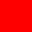

In [35]:
data = np.zeros([32, 32, 3], dtype=np.uint8)
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

gray_minist = np.array(Image.open('./data/gray_minst.jpg'),dtype=np.int32)

In [5]:
gray_minist

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,   0,
          4,   2,   0,  11,   0,   0,  14,   1,   0,  19,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12,   0,   0,   7,
          0,   1,  10,   0,   2,   2,  16,   0,   3,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7,   8,   0,   8,   0,
          0,   8,   0,   0,  19,   0,   0,   1,  21,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          1,   0,   0,   0,   0,   0,  11,   0,   0,  10,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13,   0,  15,  10,  26,
         34,  17,  77, 181, 178,  35,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150, 254, 250,
        251, 243, 252, 252, 255,  45,   6,   0,   5,   0,   9,   0,   0,
          0,   0],
       [  

In [6]:
gray_minist.shape

(28, 28)

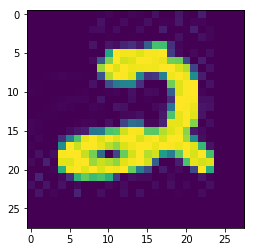

In [7]:
plt.imshow(gray_minist)

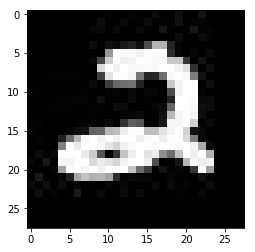

In [8]:
plt.imshow(gray_minist, cmap = 'gray')

In [9]:
RGB = np.array(Image.open('./data/RGB.jpg'),dtype=np.int32)

In [10]:
RGB.shape

(224, 224, 3)

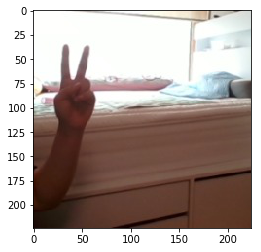

In [13]:
plt.imshow(RGB)

In [33]:
input_image = np.array(Image.open('./data/input_image.png'),dtype=np.int32)

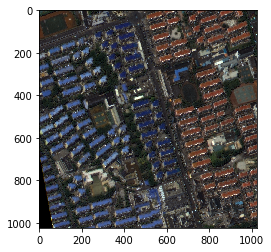

In [34]:
plt.imshow(input_image)

In [37]:
building = np.array(Image.open('./data/건물라벨.png'),dtype=np.int32)

In [39]:
building.shape

(1024, 1024, 3)

In [40]:
building[102]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

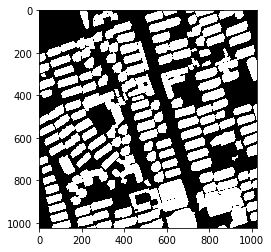

In [41]:
plt.imshow(building)

In [42]:
building = np.array(Image.open('./data/건물라벨.png').convert('L'),dtype=np.int32)

In [43]:
building.shape

(1024, 1024)

In [44]:
building[102]

array([0, 0, 0, ..., 0, 0, 0])

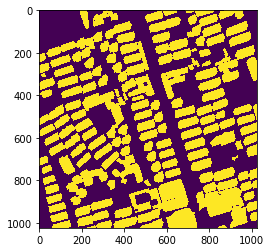

In [45]:
plt.imshow(building)

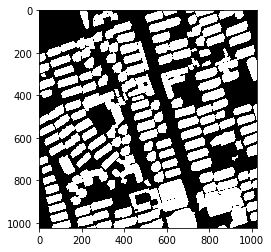

In [46]:
plt.imshow(building, cmap = 'gray')

In [29]:
road = np.array(Image.open('./data/도로라벨.png'),dtype = np.int32)

In [30]:
road.shape

(1024, 1024, 3)

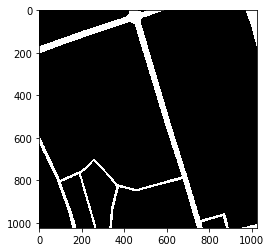

In [31]:
plt.imshow(road)

In [26]:
unified = np.array(Image.open('./data/통합시킨라벨예시.png'),dtype = np.int32)

In [27]:
unified.shape

(1024, 1024, 3)

In [241]:
unified

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

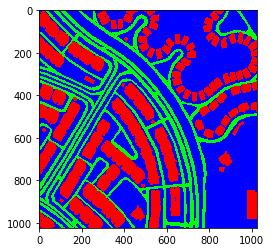

In [28]:
plt.imshow(unified)

## 퀴즈

아까 두 라벨(1024,1024,1) 짜리를 합쳐서 (1024,1024,3) 형태인 통합 라벨 만들기

![ex_screenshot](./data/건물라벨.png)
![ex_screenshot](./data/도로라벨.png)

![ex_screenshot](./data/통합라벨.png)


## 넘파이 실습

### 두더지 소스 코드

https://github.com/wesm/pydata-book/blob/2nd-edition/ch04.ipynb

### CS231n 파이썬 넘파이 튜토리얼
https://cs231n.github.io/python-numpy-tutorial/

### Numpy 100제
https://github.com/rougier/numpy-100

## Cheat Sheet 설명

fancy index

In [6]:
arr = np.arange(32).reshape((8,4))
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

transpose 다차원 tuple로 받기

In [9]:
arr = np.arange(24).reshape(2,3,4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [8]:
arr.transpose((1,0,2)) # 0번축, 1번축이 바뀌고 2번축은 2번축 제자리 유지

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [11]:
arr.swapaxes(1,2) #1번축, 2번축 교대 

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

## 배열을 이용한 배열 지향 프로그래밍 

기본 파이썬 연산에 비해 많게는 수십, 수백배 빠름

In [12]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [16]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

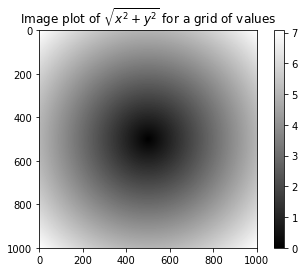

In [17]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [19]:
arr = np.random.randn(1000)

(arr > 0).sum()

487

In [20]:
bools = np.array([False,False,True, False])
bools.any()

True

In [21]:
bools.all()

False

In [23]:
arr.sort()

In [24]:
arr[int(0.05 * len(arr))] # 5% 분위수 

-1.710760546807047

## 선형대수

In [25]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

## 난수 생성

In [31]:
samples = np.random.normal(size = (4,4))

In [32]:
samples

array([[-0.85468533, -1.1289046 ,  1.51956141, -0.0884087 ],
       [ 0.95942472, -1.46695697, -1.59958237,  0.26606012],
       [-0.37460499,  2.56382328, -0.35660984, -0.27036979],
       [-0.49232809, -1.70494109, -0.91911577, -0.06474768]])

## 계단 오르내리기 예제

In [33]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

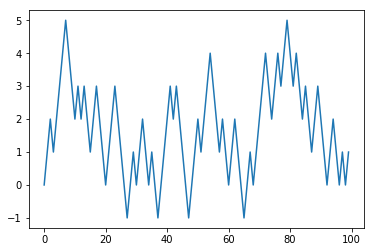

In [34]:
plt.plot(walk[:100])


In [35]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [37]:
walk.min()

-5

In [38]:
walk.max()

65

In [39]:
(np.abs(walk) >= 10).argmax()


129

## 한번에 많은 시뮬레이션 돌리기

In [40]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks


array([[  1,   2,   1, ...,  32,  31,  30],
       [  1,   0,  -1, ..., -24, -23, -24],
       [ -1,   0,  -1, ...,   4,   3,   4],
       ...,
       [ -1,  -2,  -3, ...,  18,  17,  16],
       [ -1,  -2,  -1, ...,  14,  15,  14],
       [  1,   0,  -1, ..., -16, -17, -16]], dtype=int32)

In [41]:
walks.max()

116

In [42]:
walks.min()

-129

In [43]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3343

In [44]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

499.62698175291655

In [46]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))
steps

array([[-1.59250491e-01,  1.40449875e-01,  2.37239136e-04, ...,
        -2.64343045e-01, -1.87466827e-01,  7.95506791e-02],
       [ 1.57578766e-01,  5.47336345e-01,  6.62736352e-02, ...,
         1.88691023e-01,  7.42908052e-02, -2.77892219e-03],
       [ 2.86165976e-01,  2.84426556e-01,  1.25773746e-01, ...,
        -3.30250861e-01, -3.89126817e-02, -2.14851750e-01],
       ...,
       [-4.78129884e-02,  1.89969118e-01, -8.35920785e-03, ...,
        -1.71596607e-01, -1.77423455e-01, -5.01447140e-02],
       [-9.48171586e-02,  3.63521121e-01,  3.12418966e-01, ...,
         1.63823718e-01,  1.03504727e-01,  6.56270998e-02],
       [-5.55748381e-01, -5.95759480e-02,  4.99968430e-02, ...,
         3.58533573e-01, -1.03849238e-01,  1.52795822e-02]])

# 결론

Numpy를 쓰면 기본 파이썬 연산들보다 빠르게 벡터, 행렬, tensor 연산등이 가능하다.

이미지, 숫자등 다양한 데이터를 ndarray형태로 만들어 낼 수 있다.